#### 1.What is a neural network? What are the general steps required to build a neural network? 

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through
a process that mimics the way the human brain operates. 
In this sense, neural networks refer to systems of neurons, either organic or artificial in nature.

Build a neural network in 7 steps

    Create an approximation project.

    Configure data set.

    Set network architecture.

    Train neural network.

    Improve generalization performance.

    Test results.

    Deploy model.


#### 2.Generally, how do you check the performance of a neural network? Why? 

Divide your training set in a real training set and a validation set using one of these methods:

    (k-fold / leave-one-out) Cross-validation
    stratified holdout
    0.632 bootstrap
    
Measure the performance of the ANN with one of these metrics:

    TP rate
    FP rate
    F-measure
    accuracy
    precision and recall

Many methods were implemented to measure the performance of neural networks such as MSE , NMSE , RMSE, 
R square for regression. 
And TP rate ,FP rate , F-measure , accuracy , precision and recall for classification. 

we r checking the performance of the neural network by this methods to get the accuracy of the model.

#### 3.Create a neural network using keras to predict the outcome of either of these datasets: 
Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 

Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone

#### using Ablone dataset

In [42]:
#Step 1: Assessing and Processing Data
#Import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 
import pandas as pd 
dataset = pd.read_csv('../week17repo/Abalone.CSV',header=None,names=['sex','Length', 'Diameter ', 'Height', 'Whole Weight', 'Schucked Weight','Viscera Weight ','Shell Weight ','Rings'])
dataset 


,sex,Length,Diameter,Height,Whole Weight,Schucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [43]:
dataset.sex.value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [44]:
#One hot encoding for categorical gender variable
 
Gender = dataset.pop('sex')
 
dataset['M'] = (Gender == 'M')*1.0
dataset['F'] = (Gender == 'F')*1.0
dataset['I'] = (Gender == 'I')*1.0
dataset

,Length,Diameter,Height,Whole Weight,Schucked Weight,Viscera Weight,Shell Weight,Rings,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,1.0,0.0,0.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1.0,0.0,0.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0.0,1.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1.0,0.0,0.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0.0,1.0,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1.0,0.0,0.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1.0,0.0,0.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0.0,1.0,0.0


In [45]:
#Reorder Columns
 
dataset = dataset[['Length', 'Diameter ', 'Height', 'Whole Weight', 'Schucked Weight','Viscera Weight ','Shell Weight ','M','F','I','Rings']]
dataset

,Length,Diameter,Height,Whole Weight,Schucked Weight,Viscera Weight,Shell Weight,M,F,I,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1.0,0.0,0.0,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1.0,0.0,0.0,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0.0,1.0,0.0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1.0,0.0,0.0,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0,0.0,1.0,7
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.0,1.0,0.0,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1.0,0.0,0.0,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1.0,0.0,0.0,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0.0,1.0,0.0,10


In [46]:
#Separate input data and labels
X=dataset.iloc[:,0:10]
y=dataset.iloc[:,10].values
 
#Normalize the data using the min-max scalar
 
from sklearn.preprocessing import MinMaxScaler
scalar= MinMaxScaler()
X= scalar.fit_transform(X)
y= y.reshape(-1,1)
y=scalar.fit_transform(y)

We then split the data into a training set that is composed of 80% of the dataset. The remaining 20% is the testing set.

Building and Training the Model

Then we build the Keras structure. The core of this structure is the model, which is of the “Sequential” form. This is the simplest style of model and is composed of a linear stack of layers.

In [22]:
#Build Keras Model
 
import keras
from keras import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(units=10, input_dim=10,activation='relu'))
model.add(Dense(units=1,activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','mse'])
 
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
 
history=model.fit(X_train,y_train,batch_size=5, validation_split = 0.2, callbacks=[early_stop], epochs=100)
 
# Model summary for number of parameters use in the algorithm
model.summary()

Epoch 1/100
535/535 [==============================] - 2s 4ms/step - loss: 0.0112 - mae: 0.0764 - mse: 0.0112 - val_loss: 0.0080 - val_mae: 0.0618 - val_mse: 0.0080
Epoch 2/100
535/535 [==============================] - 2s 3ms/step - loss: 0.0081 - mae: 0.0639 - mse: 0.0081 - val_loss: 0.0072 - val_mae: 0.0592 - val_mse: 0.0072
Epoch 3/100
535/535 [==============================] - 2s 3ms/step - loss: 0.0075 - mae: 0.0614 - mse: 0.0075 - val_loss: 0.0067 - val_mae: 0.0585 - val_mse: 0.0067
Epoch 4/100
535/535 [==============================] - 2s 3ms/step - loss: 0.0072 - mae: 0.0600 - mse: 0.0072 - val_loss: 0.0068 - val_mae: 0.0635 - val_mse: 0.0068
Epoch 5/100
535/535 [==============================] - 2s 3ms/step - loss: 0.0071 - mae: 0.0598 - mse: 0.0071 - val_loss: 0.0064 - val_mae: 0.0555 - val_mse: 0.0064
Epoch 6/100
535/535 [==============================] - 2s 3ms/step - loss: 0.0069 - mae: 0.0585 - mse: 0.0069 - val_loss: 0.0062 - val_mae: 0.0588 - val_mse: 0.0062
Epoch 7/10

Stacking layers is executed with model.add(). We stack a dense layer of 10 nodes that has 10 inputs feeding into the layer. The activation function chosen for this layer is a ReLU (Rectified Linear Unit), a popular choice due to better gradient propagation and sparser activation than a sigmoidal function for example. A final output layer with a linear activation function is stacked to simply return the model output. This network architecture was picked rather arbitrarily, but can be tuned to achieve better performance. The model is compiled using model.compile(). Here, we specify the type of optimizer- in this case the Adam optimizer which has become a popular alternative to the more traditional stochastic gradient descent. A mean-squared-error loss function is specified and the metrics reported will be “mean squared error” and “mean absolute error”. Then we call model.fit() to iterate training in batch sizes. Batch size corresponds to the number of training instances that are processed before the model is updated. The number of epochs is the number of complete passes through the dataset. The more times that the model can see the dataset, the more chances it has to learn the patterns, but too many epochs can also lead to overfitting. The number of epochs appropriate for this case is unknown, so I can implement a validation set that is 20% of my current training set. I set a large value of 100 epochs and add early stopping criteria that stops training when the validation score stops improving and helps prevent overfitting.

Training and validation error can be plotted as a function of epochs4

 Prediction and Assessment of Model

Once our model is trained, we can use it to predict the age of the abalone in the test set. Once the values are predicted, then they must be re-scaled back which is performed using the inverse_transform function from Scikit-learn.



In [24]:
#Predict testing labels
 
y_pred= model.predict(X_test)
 
#undo normalization 
 
y_pred_transformed=scalar.inverse_transform(y_pred.reshape(-1,1))
y_test_transformed=scalar.inverse_transform(y_test)

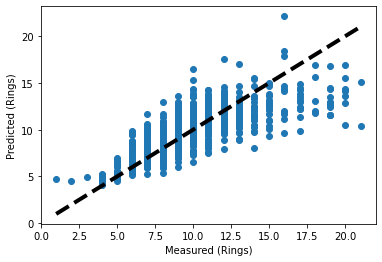

2.072954813813219
0.5452074850270103


In [26]:
#visualize performance
fig, ax = plt.subplots()
ax.scatter(y_test_transformed, y_pred_transformed)
ax.plot([y_test_transformed.min(), y_test_transformed.max()], [y_test_transformed.min(), y_test_transformed.max()], 'k--', lw=4)
ax.set_xlabel('Measured (Rings)')
ax.set_ylabel('Predicted (Rings)')
plt.show()
 
#Calculate RMSE and R^2
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test_transformed, y_pred_transformed))
print(rms)
 
from sklearn.metrics import r2_score
r_squared=r2_score(y_test_transformed,y_pred_transformed)
print(r_squared)

The performance is not ideal, but the results are appropriate given that this dataset is notoriously hard to use for prediction without other relevant information such as weather or location. Ultimately, it is up to the user to decide if these are significant/acceptable values, otherwise the neural network hyperparameters can be further fine-tuned or more input data and more features can be added to the dataset to try to improve performance.

#### 4.Write another algorithm to predict the same result as the previous question using either KNN or logistic regression.

#### KNN

In [50]:
#y = dataset["Rings"]
#X = dataset.drop(columns="Rings")

#Separate input data and labels
X=dataset.iloc[:,0:8]
y=dataset.iloc[:,8].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
# Initializing classifier and giving hyperparameter k=3
knn = KNeighborsClassifier(n_neighbors=3)
# training classifier
knn.fit(X_train, y_train)
# Evaluate the classifier
print(knn.score(X_test, y_test))
# Try changing hyperparameter
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.8660287081339713
0.8636363636363636


We get accuracy of 0.64 and 0.62 for k=3 and k=5 respectively.

#### Algorithm 2: Logistic Regression

In [53]:
 from sklearn.linear_model import LogisticRegression
# Initializing classifier with one-v-rest approach. random_state is # to ensure same results in every execution.
logr = LogisticRegression(multi_class = 'ovr', random_state=3)
# training classifier
logr.fit(X_train, y_train)
# Evaluate the classifier
print(logr.score(X_test, y_test))

0.8600478468899522


#### 5.Create a neural network using pytorch to predict the same result as question 3. 

In [54]:
dataset.shape

(4177, 11)

In [62]:
#Separate input data and labels
X=dataset.iloc[:,0:8]
y=dataset.iloc[:,8].values

In [63]:
from sklearn.preprocessing import StandardScaler
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# #Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [64]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F #this has activation functions

# Creating tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

print(X_train)

tensor([[ 0.7188,  0.7268,  0.6020,  ...,  0.7055,  0.4721,  1.3075],
        [ 0.3016,  0.4239,  0.4832,  ...,  0.8066,  0.4362, -0.7648],
        [ 0.2598,  0.3229,  0.2458,  ..., -0.3153, -0.0660,  1.3075],
        ...,
        [-0.5329, -0.4847, -0.9414,  ..., -0.8027, -0.8909, -0.7648],
        [-0.9084, -0.8380, -0.9414,  ..., -1.0004, -1.0344, -0.7648],
        [ 0.5102,  0.4239,  0.4832,  ...,  0.9860,  0.0775, -0.7648]])


In [65]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features =2):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    
    def forward(self, x):
        #apply activation functions
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [66]:
torch.manual_seed(42)

#instantiate the model
model = ANN_Model()
model

ANN_Model(
  (layer_1_connection): Linear(in_features=8, out_features=20, bias=True)
  (layer_2_connection): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [67]:
# loss function
loss_function = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

#Model Training

This part will also be extremely simple. We’ll train the model for 100 epochs, keeping track of time and loss. Every 10 epochs we’ll output to the console the current status — indicating on which epoch are we and what’s the current loss.


In [68]:
#run model through multiple epochs/iterations
final_loss = []
n_epochs = 100
for epoch in range(n_epochs):
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss.item()}')
    
    optimizer.zero_grad() #zero the gradient before running backwards propagation
    loss.backward() #for backward propagation 
    optimizer.step() #performs one optimization step each epoch
    

Epoch number: 1 with loss: 0.6248833537101746
Epoch number: 11 with loss: 0.46087217330932617
Epoch number: 21 with loss: 0.2841832935810089
Epoch number: 31 with loss: 0.2739645540714264
Epoch number: 41 with loss: 0.2651500403881073
Epoch number: 51 with loss: 0.26045286655426025
Epoch number: 61 with loss: 0.2557704746723175
Epoch number: 71 with loss: 0.251229852437973
Epoch number: 81 with loss: 0.24725529551506042
Epoch number: 91 with loss: 0.24399934709072113


In [69]:
#predictions
y_pred = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        prediction = model(data)
        y_pred.append(prediction.argmax().item())


In [70]:
from sklearn.metrics import accuracy_score
a_score = accuracy_score(y_test, y_pred)
print(a_score)

0.8911483253588517


In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       574
           1       0.84      0.80      0.82       262

    accuracy                           0.89       836
   macro avg       0.88      0.87      0.87       836
weighted avg       0.89      0.89      0.89       836



#### 6.Compare the performance of the neural networks to the other model you created. Which performed better? Why do you think that is?

with the keras model we get the accuracy of model is 0.54%, with the KNN and Logistic Regression we get the accuracy 0.86% 
and using neural network with pytorch we get the highest accuracy is 0.89%. 
so neural network with pytorch performed better.